# Small dataset training

利用datagenerator來增廣數據集做訓練

### Step1. 設定資料集


需要把當前的資料另外建立出一個資料夾結構如下  
目的是為了使用keras內建的檔案處理data generator的load_from_di來利用資料夾做分類

```
root_floder/  
   ├────/TRAIN  
   |      ├──/DOG  
   |      └──/CAT  
   ├────/TEST  
   |      ├──/DOG  
   |      └──/CAT  
   └────/VAL  
          ├──/DOG  
          └──/CAT 
```

In [1]:
import os

ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "dogs-vs-cats")
SOURCE_DATA_DIR = os.path.join(DATA_PATH, "train")

print('length of train data %d' %(len(os.listdir(SOURCE_DATA_DIR))))

length of train data 25000


In [2]:
BASE_DIR = os.path.join(DATA_PATH, "VGG_Practice")
if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
TRAIN_DIR = os.path.join(BASE_DIR, "TRAIN")
if not os.path.exists(TRAIN_DIR):
    os.mkdir(TRAIN_DIR)
    
TEST_DIR = os.path.join(BASE_DIR, "TEST")
if not os.path.exists(TEST_DIR):
    os.mkdir(TEST_DIR)

VAL_DIR = os.path.join(BASE_DIR, "Validation")
if not os.path.exists(VAL_DIR):
    os.mkdir(VAL_DIR)
    
DOG_TRAIN = os.path.join(TRAIN_DIR, "DOG")
if not os.path.exists(DOG_TRAIN):
    os.mkdir(DOG_TRAIN)

CAT_TRAIN = os.path.join(TRAIN_DIR, "CAT")
if not os.path.exists(CAT_TRAIN):
    os.mkdir(CAT_TRAIN)
    
DOG_TEST = os.path.join(TEST_DIR, "DOG")
if not os.path.exists(DOG_TEST):
    os.mkdir(DOG_TEST)
    
CAT_TEST = os.path.join(TEST_DIR, "CAT")
if not os.path.exists(CAT_TEST):
    os.mkdir(CAT_TEST)

    
DOG_VAL = os.path.join(VAL_DIR, "DOG")
if not os.path.exists(DOG_VAL):
    os.mkdir(DOG_VAL)

CAT_VAL = os.path.join(VAL_DIR, "CAT")
if not os.path.exists(CAT_VAL):
    os.mkdir(CAT_VAL)

In [3]:
import shutil

for frame in ['cat.{}.jpg'.format(i) for i in range(0,2000)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(CAT_TRAIN,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)

for frame in ['dog.{}.jpg'.format(i) for i in range(0,2000)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(DOG_TRAIN,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)
        
for frame in ['cat.{}.jpg'.format(i) for i in range(10000,11000)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(CAT_TEST,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)
        
for frame in ['dog.{}.jpg'.format(i) for i in range(10000,11000)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(DOG_TEST,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)

for frame in ['cat.{}.jpg'.format(i) for i in range(2001,3001)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(CAT_VAL,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)

for frame in ['dog.{}.jpg'.format(i) for i in range(2001,3001)]:
    source = os.path.join(SOURCE_DATA_DIR,frame)
    target = os.path.join(DOG_VAL,frame)
    if not os.path.exists(target):
        shutil.copyfile(source,target)

### Step2. 資料預處理

由於圖檔大小不一  
需要先將其設定到固定大小並且歸一化處理


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20

Train_gen = datagen.flow_from_directory(
                TRAIN_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Test_gen = datagen.flow_from_directory(
                TEST_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Val_gen = datagen.flow_from_directory(
                VAL_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Step3. 模型設計與訓練

簡單設計一個CNN

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

model = Sequential()

model.add(Conv2D(filters=20,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=20,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Conv2D(filters=50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 224, 224, 20)      560       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 224, 224, 20)      3620      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 20)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 112, 112, 40)      7240      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 112, 112, 40)      14440     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 40)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 56, 56, 50)        18050     
__________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

train_history= model.fit_generator(Train_gen,
                                   steps_per_epoch=4000/batch_size,
                                   epochs=30,
                                   validation_data=Val_gen,
                                   validation_steps=2000/batch_size,
                                   verbose=1)

Epoch 1/30
102/200 [==============>...............] - ETA: 7s - loss: 0.6945 - acc: 0.5211

In [13]:
import matplotlib.pyplot as plt

def plot_train_result(train_history,train,val):
    plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.legend(['train','validation'])
    plt.title(train+'_history')
    plt.xlabel('Epoch')
    plt.ylabel(train,fontsize=20)
    plt.show()
    
plot_train_result(train_history,'acc','val_acc')

<Figure size 640x480 with 1 Axes>

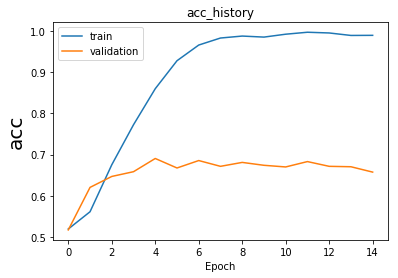

In [14]:
plot_train_result(train_history,'acc','val_acc')

In [15]:
scores = model.evaluate_generator(Test_gen,Test_gen.samples/batch_size)
print('test data accuracy: %.2f' %(scores[1]*100))

test data accuracy: 64.95


### Step4. 產生更多資料

在上面的結果是來自於我們的訓練資料集，共兩千張貓與兩千張狗的訓練成果  
接下來我們利用ImageDataGenerator來產生更多的訓練圖集  
[ImageDataGenerator](https://keras.io/preprocessing/image/)

In [22]:
datagen2=ImageDataGenerator(rotation_range=30,
                            rescale=1./255,
                            shear_range=0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                           )

利用此datagenerator來畫出幾張圖像看看  
可以得到藉由 平移/縮放/旋轉...等等，獲得的圖像  

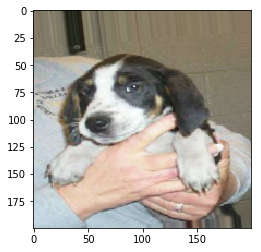

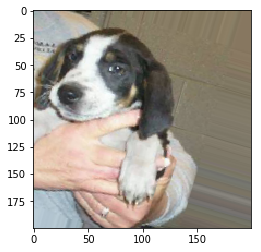

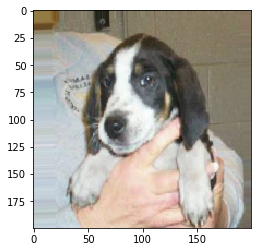

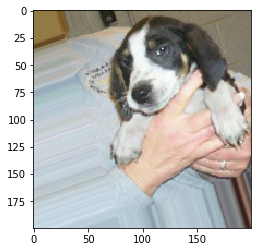

In [23]:
from keras.preprocessing import image

img = os.path.join(SOURCE_DATA_DIR,'dog.10.jpg')

image_ent = image.load_img(img,target_size=(200,200)) 

image_ent = image.img_to_array(image_ent)

image_ent = image_ent.reshape((1,)+image_ent.shape)
i = 0
for images in datagen2.flow(image_ent,batch_size=1):
    
    images = image.array_to_img(images[0])    
    plt.figure(i)
    plt.imshow(images)

    i+=1
    if i == 4:
        break

建立另一組Data generator

In [18]:
Train_gen2 = datagen2.flow_from_directory(
                TRAIN_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Test_gen2 = datagen2.flow_from_directory(
                TEST_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Val_gen2 = datagen2.flow_from_directory(
                VAL_DIR,
                target_size=(224,224),
                batch_size=batch_size,
                class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Step5. 建立另外一組模型來看結果

In [19]:
model2 = Sequential()

model2.add(Conv2D(filters=20,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224,224,3)))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters=20,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model2.add(Conv2D(filters=20,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model2.add(Flatten())
model2.add(Dense(20,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 20)      560       
_________________________________________________________________
dropout_6 (Dropout)          (None, 224, 224, 20)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 20)      3620      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 20)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 20)      3620      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 20)      3620      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 20)        0         
__________

In [21]:
train_history2= model2.fit_generator(Train_gen2,
                                     steps_per_epoch=4000/batch_size,
                                     epochs=30,
                                     validation_data=Val_gen2,
                                     validation_steps=2000/batch_size,
                                     verbose=1)

Epoch 1/15
200/200 [==============================] - 73s 366ms/step - loss: 0.6895 - acc: 0.5465 - val_loss: 0.6931 - val_acc: 0.4995
Epoch 2/15
200/200 [==============================] - 71s 356ms/step - loss: 0.6895 - acc: 0.5280 - val_loss: 0.6904 - val_acc: 0.5400
Epoch 3/15
200/200 [==============================] - 71s 355ms/step - loss: 0.6852 - acc: 0.5750 - val_loss: 0.6763 - val_acc: 0.6090
Epoch 4/15
200/200 [==============================] - 69s 347ms/step - loss: 0.6796 - acc: 0.5678 - val_loss: 0.6813 - val_acc: 0.5875
Epoch 5/15
200/200 [==============================] - 69s 345ms/step - loss: 0.6628 - acc: 0.5948 - val_loss: 0.6653 - val_acc: 0.5770
Epoch 6/15
200/200 [==============================] - 67s 337ms/step - loss: 0.6695 - acc: 0.5945 - val_loss: 0.6680 - val_acc: 0.5800
Epoch 7/15
200/200 [==============================] - 67s 333ms/step - loss: 0.6466 - acc: 0.6157 - val_loss: 0.6474 - val_acc: 0.6205
Epoch 8/15
200/200 [==============================] - 6

In [ ]:
plot_train_result(train_history2,'acc','val_acc')

In [ ]:
plot_train_result(train_history,'acc','val_acc')